### Working with FITS files

In [1]:
from astropy.io import fits

The *open()* function in [astropy.io.fits](http://docs.astropy.org/en/stable/io/fits/index.html#) works with regular and compressed files.

Open a FITS file and look at the contents:

In [2]:
f = fits.open('j94f05bgq_flt.fits.gz')
f.info()
f.close()

Filename: j94f05bgq_flt.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     240   ()      
  1  SCI           1 ImageHDU       198   (1, 1)   float32   
  2  ERR           1 ImageHDU        69   ()      
  3  DQ            1 ImageHDU        69   ()      
  4  SCI           2 ImageHDU       184   (1, 1)   float32   
  5  ERR           2 ImageHDU        69   ()      
  6  DQ            2 ImageHDU        69   ()      


In [3]:
fits.info('j94f05bgq_flt.fits.gz')

Filename: j94f05bgq_flt.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     240   ()      
  1  SCI           1 ImageHDU       198   (1, 1)   float32   
  2  ERR           1 ImageHDU        69   ()      
  3  DQ            1 ImageHDU        69   ()      
  4  SCI           2 ImageHDU       184   (1, 1)   float32   
  5  ERR           2 ImageHDU        69   ()      
  6  DQ            2 ImageHDU        69   ()      


In [4]:
type(f)

astropy.io.fits.hdu.hdulist.HDUList

FITS file objects are like lists. Individual HDUs are indexed like lists.

In [5]:
f[1]

or using a (EXTNAME, EXTVER) tuple.

In [6]:
f[("SCI", 1)]

astropy v 1.3 implements lazy loading of FITS files. To turn the feature off pass *lazy_load_hdus=False* to read all
the HDUs into memory immediately upon opening the file.

In [7]:
f.info()

Filename: j94f05bgq_flt.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     240   ()      
  1  SCI           1 ImageHDU       198   (1, 1)   float32   
  2  ERR           1 ImageHDU        69   ()      
  3  DQ            1 ImageHDU        69   ()      
  4  SCI           2 ImageHDU       184   (1, 1)   float32   
  5  ERR           2 ImageHDU        69   ()      
  6  DQ            2 ImageHDU        69   ()      


### Working with headers

Headers are similar to python dictionaries.
Look at a header, modify an existing keyword and add a new card.

In [8]:
with fits.open('j94f05bgq_flt.fits.gz', mode='update') as f:
    # Updating a keyword
    print("crpix1: ", f[1].header['crpix1'])
    f[1].header['crpix1'] = 12
    print("Updated crpix1 :", f[1].header['crpix1'])

f.info()

crpix1:  12
Updated crpix1 : 12
Filename: j94f05bgq_flt.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     240   ()      
  1  SCI           1 ImageHDU       198   (1, 1)   float32   
  2  ERR           1 ImageHDU        69   ()      
  3  DQ            1 ImageHDU        69   ()      
  4  SCI           2 ImageHDU       184   (1, 1)   float32   
  5  ERR           2 ImageHDU        69   ()      
  6  DQ            2 ImageHDU        69   ()      


Opening a FITS file using the Python *with* statement
ensures that the file is closed without explicitely doing so.

There are several ways to add a new card.

Note: Attempting to access a non-existing keyword raises a *KeyError*.

In [9]:
#print(f[1].header['observer'])
    

In [10]:
f[1].header['observer'] = "Edwin Hubble"
    
# Assigning a tuple to a keyword splits
# the tuple into a keyword value and comment.
    
f[1].header['NOBS'] = (2, "Number of observing nights")
print("observer:", f[1].header['observer'])
print(f[1].header.comments['NOBS'], f[1].header['NOBS'])

observer: Edwin Hubble
Number of observing nights 2


To delete a keyword/card use the python *del* operator.

Again a *KeyError* is raised if the keyword is not in the header.

In [11]:
    del f[1].header['NOBS']
    del f[1].header['observer']
    

Comment and history cards are added as regular keywords. In this case a new card is always created.

In [12]:
with fits.open('j94f05bgq_flt.fits.gz', mode='update') as f:
    f[1].header["history"] = "New history card."
    f[1].header["comment"] = "This is a 47 Tuc observation with HST"
    f[1].header["comment"] = "I'd like to observe it with JWST."
    f[1].header['comment']
    print(f[1].header['comment'])

This is a 47 Tuc observation with HST
I'd like to observe it with JWST.
This is a 47 Tuc observation with HST
I'd like to observe it with JWST.
This is a 47 Tuc observation with HST
I'd like to observe it with JWST.


### Working with image data

In [13]:
f = fits.open('pix.fits.gz')
f.info()

Filename: pix.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      53   (512, 512)   int16   


An image is a numpy array saved as the data part of an HDU.

In [14]:
scidata = f[0].data
print(scidata.shape)
print(scidata.dtype)

(512, 512)
>i2


*scidata* is a pointer to the data array of the HDU and if it changes, the data in the HDU changes as well.

In [15]:
# All operations available to NDArray are applicable to the fits data array.
scidata[2:10, 3:7].mean()

38.375

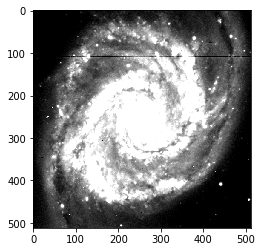

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(scidata, vmin=50, vmax=150, cmap='gray')

astropy.io.fits provides convenience functions to operate on 
fits files. These are good for interactive and quick lookup use.
It is recommended to use the OO interface for programming.

In [17]:
# Get the data from an HDU 
data = fits.getdata('pix.fits.gz')
print("min, max: ", data.min(), data.max())

min, max:  -1 19936


In [18]:
# Get a keyword value
wcsaxes = fits.getval('j94f05bgq_flt.fits.gz', keyword="WCSAXES", ext=1)
print("wcsaxes:", wcsaxes)

wcsaxes: 2


In [19]:
# Set a keyword value
fits.setval("j94f05bgq_flt.fits.gz", keyword="observer", value="Edwin Hubble")

print("OBSERVER: ", fits.getval("j94f05bgq_flt.fits.gz", keyword="OBSERVER"))

OBSERVER:  Edwin Hubble


In [20]:
# Remove a keyword from a header
fits.delval("j94f05bgq_flt.fits.gz", keyword="OBSERVER")

### Working with FITS tables

**Note**: The recommended method to read and write a single FITS table is using the [Unified I/O read/write interface](http://docs.astropy.org/en/stable/io/unified.html#table-io-fits).

Here we show an example of using [astropy.io.fits](http://docs.astropy.org/en/stable/io/fits/index.html#) as there exists a lot if legacy code which uses it.

In [21]:
f = fits.open('table.fits')
f.info()

Filename: table.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     12   3R x 2C   [20A, E]   


In [22]:
data = f[1].data
print("Column names: ", data.names)

print("Row 1: ", data[1])

print('Column "target": ', data.field("target"))

print("Number of rows: ", len(data))

Column names:  ['target', 'V_mag']
Row 1:  ('NGC1002', 12.3)
Column "target":  ['NGC1001' 'NGC1002' 'NGC1003']
Number of rows:  3


### Working with large files

The *open()* function supports a *memmap=True* argument that allows the array data of each HDU to be accessed with mmap, rather than being read into memory all at once. This is particularly useful for working with very large arrays that cannot fit entirely into physical memory.

### Exercise:

Construct programmatically a FITS file with 1 image extension 
and save it to disk. Use a numpy array with random numbers as 
data.

    Hints: 
    Use fits.HDUList() to create a FITS file.
    Use fits.PrimaryHDU() for the primary HDU and 
    fits.ImageHDU() for the image HDU. 

To look at the signature of a python object type one of

    >>> help(fits.ImageHDU)
    >>> fits.ImageHDU?

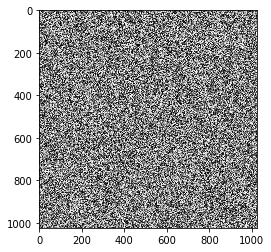

In [23]:
import numpy as np

# Generate random image data
axis_length = 1024
rand_image = np.random.random((axis_length,axis_length))
plt.imshow(rand_image, cmap='gray')

In [24]:
# Create Header Data Units
primary_hdu = fits.PrimaryHDU()
image_hdu = fits.ImageHDU(data=rand_image)
header = image_hdu.header
header['NAXIS1'] = axis_length
header['NAXIS2'] = axis_length

# Create the FITS file by adding the HDU created above to it.
myfits = fits.HDUList([primary_hdu, image_hdu])
myfits.writeto('myfits.fits')

In [25]:
myfits.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 ImageHDU         7   (1024, 1024)   float64   
